# Look at Twist Y SNPs

In [77]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt

import socket
import os as os
import sys as sys
import multiprocessing as mp

# For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
# Make sure to have the font installed (it is on cluster for Harald)
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/y_chrom/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

compute-a-16-162.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/y_chrom
CPU Count: 32
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


In [2]:
path_twist = "/home/der3/RESEARCH/NADIN/TWIST/PICKS/1400k.snps"

In [25]:
def load_twist_y_df(path_snp = "/n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/punic0.v43.snp", sep="\t", ch="Y"):
    """Return 1240k SNP df"""
    df_snp0 = pd.read_csv(path_snp, sep=sep)
    print(f"Loaded {len(df_snp0)} SNPs")
    #df_snp0.columns = ["snp", "chr", "map", "pos", "ref", "alt"]
    df_y = df_snp0[df_snp0["chrom"]==ch]
    print(f"Extracted to {len(df_y)} Y SNPs")
    return df_y

In [112]:
%time
df = load_twist_y_df(path_twist)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 13.8 µs
Loaded 1352535 SNPs
Extracted to 81925 Y SNPs


In [120]:
pos = df[df["SNP.position.in.hg19"]<30e6]["SNP.position.in.hg19"].values

### Plot pairwise Distances

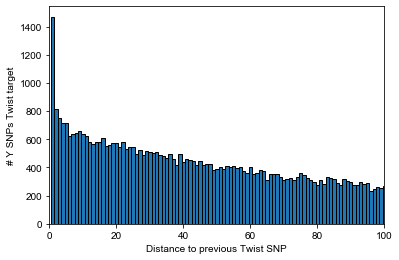

In [121]:
delta = pos[1:]- pos[:-1]

bins=np.linspace(-0.5,999.5,1001)

plt.figure(figsize=(6,4))
ax=plt.gca()
ax.hist(delta, bins=bins, ec="k")
ax.set_xlim([0,100])
ax.set_xlabel("Distance to previous Twist SNP")
ax.set_ylabel("# Y SNPs Twist target")
plt.show()

In [122]:
np.sum(delta<20)

12875

In [124]:
np.sum(delta<20)

12875

In [47]:
bins = np.arange(np.min(pos),np.max(pos),50)

In [49]:
len(bins)

523288

In [50]:
%%time
d = np.digitize(pos, bins, right=True)

CPU times: user 7.6 ms, sys: 3.12 ms, total: 10.7 ms
Wall time: 16.3 ms


In [53]:
hist = pd.value_counts(d)

In [65]:
np.sum(hist.values > 0)

66544

In [67]:
10e6/40

250000.0

In [69]:
66544 * 50

3327200

In [125]:
def load_twist_df(path_snp = "/n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/punic0.v43.snp", sep="\t", ch="Y"):
    """Return 1240k SNP df"""
    df_snp0 = pd.read_csv(path_snp, sep=sep)
    print(f"Loaded {len(df_snp0)} SNPs")
    #df_snp0.columns = ["snp", "chr", "map", "pos", "ref", "alt"]
    return df_snp0

In [130]:
df1 = load_twist_df(path_twist)

Loaded 1352535 SNPs


In [132]:
close = 0
tot_len = 0
for i in range(1,23):
    df2 = df1[df1["chrom"]==3]
    pos = df2["SNP.position.in.hg19"].values
    delta = pos[1:]- pos[:-1]
    close += np.sum(delta<20)
    tot_len+=len(df2)

In [133]:
close/tot_len

0.010794919764347715

In [134]:
close

20438

In [129]:
np.sum(delta<20)#/len(delta)

929